# Le concept de phaseur

## Onde imaginaire et partie réelle

On peut représenter l'onde complexe $t\mapsto e^{i.\omega.t}$ (notée en bref $t\mapsto e^{i.\omega.t}$$e^{i.\omega.\bullet}$) dans le plan complexe (vision phaseur/Fresnel) ou la projeter sur les réels pour obtenir un cosinus.


In [71]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=22,10

from numpy import pi, real, imag, abs, angle, cos, sin, exp, arange

In [66]:

def plot_cplx(s, tps=0, t=None ):
    if t is None:
        Te=0.01
        t=arange(-1.1,1.2,Te)
    else:
        Te=t[1]-t[0]

    
    fig = plt.figure(figsize=plt.figaspect(1.))
    axcpl=fig.add_subplot(221)
    axcpl.set_xlabel(f'Réel')
    axcpl.set_ylabel(f'Imag')
    axcpl.set_title(f'Plan Laplace')
    axcpl.grid("on")
    
    aximag=fig.add_subplot(222)
    aximag.set_xlabel(f't')
    aximag.set_ylabel(f'Imaginaire')
    aximag.set_title(f'Projection sur imaginaire')
    aximag.grid("on")
    
    axreel=fig.add_subplot(223)
    axreel.set_xlabel(f't')
    axreel.set_ylabel(f'Réel')
    axreel.set_title(f'Projection sur réels')
    axreel.grid("on")
    
    ax3d = fig.add_subplot(224,projection='3d')
    ax3d.set_xlabel(f't')
    ax3d.set_zlabel(f'Réel')
    ax3d.set_ylabel(f'Imaginaire')
    ax3d.set_title(f'Onde complexe 3d')
    
    sig=s(t)
    axcpl.plot(real(sig),imag(sig))
    axcpl.plot(real(s(tps)),imag(s(tps)),'o')
    aximag.plot(t,imag(sig))
    aximag.plot(tps,imag(s(tps)),'o')
    axreel.plot(t,real(sig))
    axreel.plot(tps,real(s(tps)),'o')
    ax3d.plot(t,imag(sig),real(sig))
    ax3d.plot(tps,imag(s(tps)),real(s(tps)),'o')
    
def plot_onde_pure(tps=0,w=2*pi):
    onde = lambda t : exp(1j*w*t)
    tlast = min(100,2.2*pi/w)
    t=arange(0,tlast,tlast/1000)
    plot_cplx(onde,t=t,tps=tps)
    
#plot_cplx(lambda t : onde(w,t),t=t)
_ = interact(plot_onde_pure, tps=(t[0],t[-1],0.1), w=(0,4*pi,pi/8))

interactive(children=(FloatSlider(value=0.0, description='tps', max=1.09), FloatSlider(value=6.283185307179586…

On comprend parfaitement ici la formule d'Euler appliquée à l'onde complexe : $e^{i\omega.t}=\cos(i\omega.t) + i.\sin(\omega.t)$

## Phaseur

Un phaseur $z$ est un nombre complexe qui va être multiplié à l'onde complexe $e^{i\omega\bullet}$

En représentation polaire $z=\rho.e^{i\varphi}$, et dans ce cas :
   - le module $\rho$ aura un effet d'amplification de l'onde
   - l'argument $\varphi$ aura un effet de rotation d'un ampgle $\varphi$ radians. L'onde multipliée aura ainsi un déphasage de $\varphi$ par rapport à l'onde de base  $e^{i\omega\bullet}$

In [69]:
def plot_onde_phaseur(tps=0,w=2*pi,rho=1,phi=0):
    onde = lambda t : exp(1j*w*t)
    onde_phasee = lambda t: onde(t)*rho*exp(1j*phi)
    
    tlast = min(100,2.2*pi/w)
    t=arange(0,tlast,tlast/1000)
    plot_cplx(onde_phasee,t=t,tps=tps)
    
#plot_cplx(lambda t : onde(w,t),t=t)
_ = interact(plot_onde_phaseur, tps=(t[0],t[-1],0.1), w=(0,4*pi,pi/8), rho = (0,2,0.1), phi = (-1.125*pi,1.125*pi,pi/8))

interactive(children=(FloatSlider(value=0.0, description='tps', max=1.09), FloatSlider(value=6.283185307179586…

Le phaseur appelé $\vec{I}$ pour **In phase** (avec le cosinus) est celui qui permet d'obtenir un **cosinus en partie réelle**.

Le phaseur appelé $\vec{Q}$ pour **Quadrature** (avec le cosinus) est celui qui permet d'obtenir un **sinus en partie réelle**.

A vous de trouver la valeur du phaseur $\vec{Q}$ donnant un sinus en partie réelle.



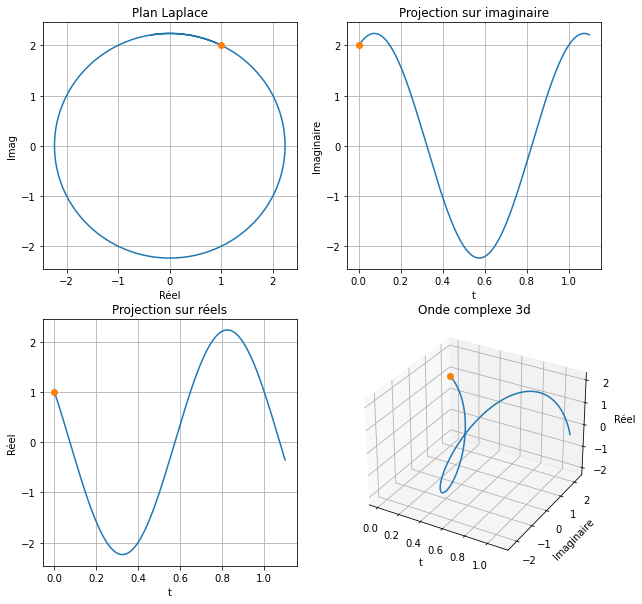

In [74]:
Q = 2j + 1 # Modifiez ce nombre complexe et SHIFT + ENTREE pour voir

plot_onde_phaseur(tps=0,w=2*pi,rho=abs(Q),phi=angle(Q))

## Représentations complexes d'une fonction réelle
---

Dans le cas de fonctions réelles à valeurs réelles ($f : \mathbb{R}\to\mathbb{R}$), chaque composante réelle est une onde pure que l'on peut représenter par un phaseur :
<table>
  <tr>
    <td><img src=./anim_phaseur_somme.gif width=200></td>
    <td> \( \begin{array}{c} y(t) = \overbrace{A.e^{i\varphi}}^{\text{phaseur } z_y}.e^{\omega t} \in \mathbb{C} \\ s(t) = \mathcal{R}\left(y(t)\right) \in \mathbb{R} = A\cos(\omega t + \varphi) \\ \\ \mathcal{R}\left(y_1(t)=z_1.e^{i\omega t}\right)  = A_1\cos(\omega t + \varphi_1) \\ \mathcal{R}\left(y_2(t)=z_2.e^{i\omega t}\right) = A_2\cos(\omega t + \varphi_2) \\ y(t) = y_1(t) + y_2(t) = \underbrace{(z_1+z_2)}_{z}.e^{i\omega t} \in \mathbb{C} \\ \\ z = z_1 + z_2 \text{ constantes complexes}\\\mathcal{R}\left(y=y_1+y2\right) = \mathcal{R}\left(y_1\right) + \mathcal{R}\left(y_2\right) \\ A\cos(\omega t + \varphi) = A_2\cos(\omega t + \varphi_2) + A_1\cos(\omega t + \varphi_1)  \end{array} \) </td>
  </tr>
</table> 
 
Le phaseur est donc un vecteur du plan complexe représenté à l'instant $t=0$. Ce vecteur tourne en étant multiplié par $e^{\omega t}$ créant une onde complexe dont la partie réelle est le signal réel représenté. En représentation I, Q le phaseur est décomposé en :
* "In phase" $I \leftrightarrow z_2 = 1.e^{i 0}$ (bleu) est sur l'axe réel vers la droite ($A_2=1, \varphi_2=0$) : sa projection sur les réels donne $\cos{\omega t}$
* "in Quadrature" $Q \leftrightarrow z_1 = 1.e^{-i\frac{\pi}{2}}$ (rouge) est **vers le bas** sur l'axe imaginaire ($A_1=1, \varphi_1=-\frac{\pi}{2}$) : sa projection sur les réels donne $\sin(\omega t)$

On décompose alors $z = I z_2 + Q z_1$ pour obtenir $s(t) = I cos(\omega t) + Q \sin(\omega t) = A \cos{(\omega t + \varphi)}$

# Représentation cos + sin : I,Q ou a(n), b(n)

On peut représenter n'importe quelle onde déphasée et amplifiée sous forme d'un cosinus + un sinus.

En télécom c'est la représentation IQ : 

$A.cos(\omega.t+\varphi) = I.\cos(\omega.t) + Q.\sin(\omega.t)$

Pour les séries de Fourier on utilisera des pulsations multiples d'une pulsation fondamentale  $\omega_0$ et pour chaque multiple de rang $n$ de pulsation $\omega_n = n.\omega_0$ on aura une onde déphasée représenté par deux coefficients $a(n)$ et $b(n)$ :

$A_n . cos(\omega_n.t+\varphi_n) = a(n).\cos(\omega_n.t) + b(n).\sin(\omega.t)$

> Essayez ci-dessous de trouver le I (ou a(n)) et le Q (ou b(n)) permettant d'avoir 
>
> un cosinus d'amplitude $\sqrt{2}$ et d'avance de phase de $\pi/4$

In [75]:
def IQ(I=1,Q=1,w=2*np.pi):
    fig,ax = plt.subplots(1,2)
    ax1=ax[0]
    ax2=ax[1]
    t=np.arange(-1.1*np.pi/w,1.2*np.pi/w,0.01)
    N0 = int(1.1*np.pi/w / 0.01)
    s = I*np.cos(w*t)+Q*np.sin(w*t)
    ax1.plot(t,I*np.cos(w*t),
             t,Q*np.sin(w*t),
             t,s)
    ax1.set_ylim(-3.4,4.4)
    minid = s.argmax()
    ax1.legend(["Inphase = I.cos(w.t)",
                "Quadrature=Q.sin(w.t)",
                "I.cos(w.t)+Q.sin(w.t)"],
              loc = "lower left")
    ax1.plot(t[minid],s[minid],'+')
    ax1.plot((0,t[minid]),(s[minid],s[minid]),'o-')
    ax1.text(t[minid]+0.05,s[minid],"A="+s[minid].__str__()[:4])
    ax1.text(t[minid]/2,s[minid]+0.3,r"$\varphi$ ="+(-t[minid]/2/np.pi*w*360).__str__()[:4])
    ax1.grid("on")
    sc= np.exp(1j*w*t)
    ax2.set_xlim(-3,3)
    ax2.set_ylim(-3,3)
    ax2.grid("on")
    ax2.plot([0,I],[0,0],[0,0],[0,-Q],[0,I],[0,-Q])
    ax2.plot(I,-Q,'+')
    Nd = min(N0,minid)
    Nf = max(N0,minid)+1
    ax2.plot(np.real(sc[Nd:Nf]),-np.imag(sc[Nd:Nf]),'-o')
    ax2.text(I+0.05,-Q-0.05,"A="+s[minid].__str__()[:4])
    ax2.text(1.1*np.real(sc[int((Nd+Nf)/2)]),-1.1*np.imag(sc[int((Nd+Nf)/2)]),r"$\varphi$ ="+(-t[minid]/2/np.pi*w*360).__str__()[:4])
    ax2.plot(np.real(sc),np.imag(sc),'-.k')
    ax2.quiver([0,0],[0,0],[0,1],[-1,0])
    ax2.text(0.1,0.1,r"$\vec{I}$")
    ax2.text(-0.2,-0.1,r"$\vec{Q}$")
    
_ = interact(IQ, I=(-3,3,0.1), Q=(-3,3,0.1), w=fixed(2*np.pi))

interactive(children=(FloatSlider(value=1.0, description='I', max=3.0, min=-3.0), FloatSlider(value=1.0, descr…